# Occam's Razor:

- try to choose a model that is simple but not too simple.

### WHy to choose simple models?

- Reason: Simple models are generalized i.e. their performance on unseen data is better.
- Way too complex models- If a model is way too complex, if will overfit the training data.
- Way too simple- It will underfit the training data.


### How to avoid overfitting:

- Get more data.
Early stoppling.
- Dropout (DL)
- Feature ENgg:
- Feature transformation
- Feature selection
- Regularization
- Ensembles

## Model Complexity vs Train Test Error

- Way too Complex Models - OVERFITTING - Low Train Error and High Test Error
- Way too Simple Models - UNDERFITTING - High Train Error and High Test Error

### Bias Variance Tradeoff;
- Way too complex models- Overfitting - High variance and low bias
- Way too simple models- Undefitting- High bias and low variance.|

In [1]:
# HyperParameter Tuning

In [2]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import  numpy as np

In [3]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# splitting input and target
x=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']


In [5]:
# hold out strategy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)
from sklearn.metrics import accuracy_score


In [6]:
train_scores,test_scores=list(),list()


In [7]:
train_scores

[]

In [8]:
values=[ i for i in range(1,21)] # values for k

for i in values:
        model=KNeighborsClassifier(n_neighbors=i)
        model.fit(x_train,y_train)

        y_train_pred=model.predict(x_train)
        train_score=accuracy_score(y_train,y_train_pred)
        train_scores.append(train_score)

        y_test_pred=model.predict(x_test)
        test_score=accuracy_score(y_test,y_test_pred)
        test_scores.append(test_score)

        print("> %d, train_score: %.3f, test_score: %.3f" %(i, train_score, test_score))

> 1, train_score: 1.000, test_score: 0.933
> 2, train_score: 0.975, test_score: 0.900
> 3, train_score: 0.975, test_score: 0.933
> 4, train_score: 0.975, test_score: 0.933
> 5, train_score: 0.983, test_score: 0.967
> 6, train_score: 0.967, test_score: 1.000
> 7, train_score: 0.975, test_score: 1.000
> 8, train_score: 0.975, test_score: 0.967
> 9, train_score: 0.975, test_score: 1.000
> 10, train_score: 0.958, test_score: 1.000
> 11, train_score: 0.967, test_score: 1.000
> 12, train_score: 0.958, test_score: 0.967
> 13, train_score: 0.975, test_score: 1.000
> 14, train_score: 0.958, test_score: 1.000
> 15, train_score: 0.975, test_score: 1.000
> 16, train_score: 0.967, test_score: 1.000
> 17, train_score: 0.967, test_score: 1.000
> 18, train_score: 0.967, test_score: 1.000
> 19, train_score: 0.967, test_score: 1.000
> 20, train_score: 0.967, test_score: 1.000


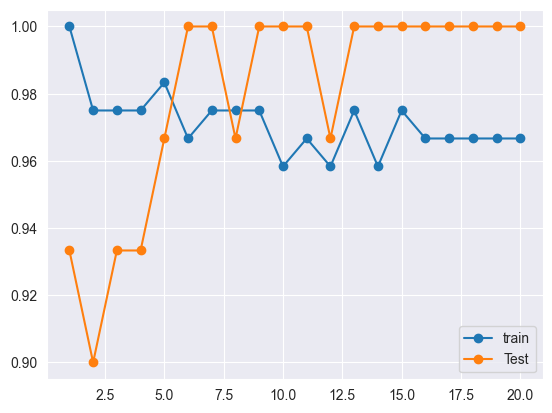

In [9]:
#plot train and test scores

plt.plot(values, train_scores,"-o", label="train")

plt.plot(values, test_scores,"-o", label="Test")
plt.legend()

In [10]:
# performing the cross validation

In [11]:
# Grid Search cv
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier


In [12]:
tuned_pram=[{'n_neighbors':[i for i in range(1,51)],'p':[1,2,3]}]


In [13]:
clf=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=tuned_pram,verbose=1,scoring='accuracy',cv=5,return_train_score=True)
clf.fit(x_train,y_train)


Fitting 5 folds for each of 150 candidates, totalling 750 fits


,estimator,KNeighborsClassifier()
,param_grid,"[{'n_neighbors': [1, 2, ...], 'p': [1, 2, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_neighbors,3


In [14]:
print("Best parameter set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)

print("Score on test data", clf.score(x_test,y_test))

Best parameter set found on train set
{'n_neighbors': 3, 'p': 1}
KNeighborsClassifier(n_neighbors=3, p=1)
Score on test data 0.9333333333333333


In [15]:
clf=RandomizedSearchCV(estimator=KNeighborsClassifier(),param_distributions=tuned_pram,verbose=1,scoring='accuracy',cv=5,return_train_score=True)
clf.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,KNeighborsClassifier()
,param_distributions,"[{'n_neighbors': [1, 2, ...], 'p': [1, 2, ...]}]"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [16]:
print("Best parameter set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)

print("Score on test data", clf.score(x_test,y_test))

Best parameter set found on train set
{'p': 2, 'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)
Score on test data 0.9333333333333333
